## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the dataset 

In [2]:
df = pd.read_excel(r'D:/My job/Sales_analysis/excel/Project Data/Combined_Data.xlsx')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,319670.0,Bose SoundSport Headphones,1.0,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001"
1,319669.0,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"
2,319668.0,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
3,319667.0,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
4,319666.0,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186821,NaN,Product,NaN,NaN,NaT,Purchase Address
186822,NaN,Product,NaN,NaN,NaT,Purchase Address
186823,NaN,NaN,NaN,NaN,NaT,NaN
186824,NaN,Product,NaN,NaN,NaT,Purchase Address


In [3]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186826 entries, 0 to 186825
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  float64       
 1   Product           186282 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186282 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 8.6+ MB


In [4]:
# Summary statistics
df.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,185950.000000,185950.000000,185950.000000,185950
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00
std,51512.737110,0.442793,332.731330,NaN


## Cleaning The Data

In [5]:
# Count the number of rows before removing null values
total_rows_before_null = df.shape[0]

# Remove rows with null values and count the number of removed null rows
df_no_null = df.dropna(how='any')
removed_null_rows = total_rows_before_null - df_no_null.shape[0]

# Count the number of rows before removing duplicates (from data without nulls)
total_rows_before_duplicates = df_no_null.shape[0]

# Remove duplicate rows from the dataset without nulls and count the number of removed duplicates
df_cleaned = df_no_null.drop_duplicates()
removed_duplicates = total_rows_before_duplicates - df_cleaned.shape[0]

# Count the total number of rows after cleaning
total_rows_after = df_cleaned.shape[0]

print(f"Number of Null Rows Removed: {removed_null_rows}")
print(f"Number of Duplicate Rows Removed: {removed_duplicates}")
print(f"Total Rows After Cleaning: {total_rows_after}")


Number of Null Rows Removed: 876
Number of Duplicate Rows Removed: 264
Total Rows After Cleaning: 185686


## Prepare The Data For Analysis

In [6]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.copy()

# Convert 'Order ID' and 'Quantity Ordered' columns to integers
df_cleaned['Order ID'] = df_cleaned['Order ID'].astype(int)
df_cleaned['Quantity Ordered'] = df_cleaned['Quantity Ordered'].astype(int)

# Split the "Purchase Address" column into Street, City, and Zip Code
df_cleaned[['Street', 'City', 'ZipCode']] = df_cleaned['Purchase Address'].str.split(', ', expand=True)

# Calculate the Total Price for each row
df_cleaned['Total Price'] = df_cleaned['Quantity Ordered'] * df_cleaned['Price Each']

# separate the hours from the date column 
df_cleaned['Order Hour'] = df_cleaned['Order Date'].dt.hour

# Display the first few rows of the DataFrame
df_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street,City,ZipCode,Total Price,Order Hour
0,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",747 Chestnut St,Los Angeles,CA 90001,99.99,21
1,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,TX 75001,11.99,10
2,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,WA 98101,400.00,6
3,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,CA 90001,7.68,12
4,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,CA 94016,14.95,20


## Exploratory Data Analysis (EDA):
**Answering Business Questions**

## Q1: What was the best month for sales? How much was earned that month?

In [7]:
# Extract Month and Year from the 'Order Date' column
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.strftime('%Y-%m')

# Group and Sum Sales by Month
monthly_sales = df_cleaned.groupby('Order Month')['Total Price'].sum()

# Find the Best Month for Sales
best_month = monthly_sales.idxmax()

# Calculate the Earnings for the Best Month
earnings_for_best_month = monthly_sales.max()

The best month for sales was 2019-12 with earnings of $4608295.70.


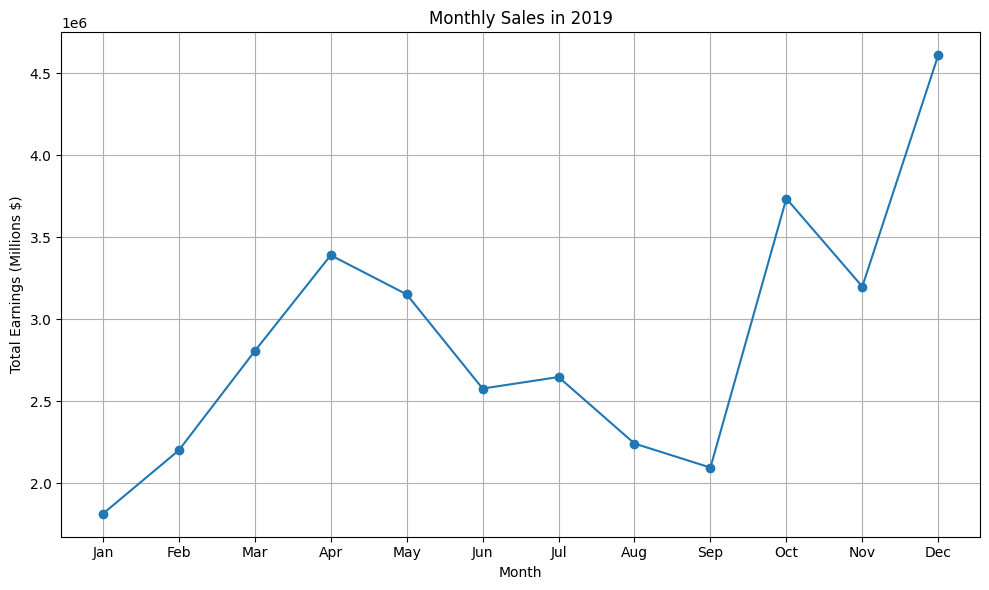

In [8]:
# Visualization Part
import calendar

# Filter the data for the year 2019
monthly_sales_2019 = monthly_sales['2019-01':'2019-12']

# Create a list of month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# Create the line chart for 2019 with month labels
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_sales_2019.values, marker='o', linestyle='-')
plt.title("Monthly Sales in 2019")
plt.xlabel("Month")
plt.ylabel("Total Earnings (Millions $)")
plt.grid(True)
plt.tight_layout()

# Display the Results
print(f"The best month for sales was {best_month} with earnings of ${earnings_for_best_month:.2f}.")

# Show the line chart
plt.show()



## Q2: What City had the highest number of sales?

The city with the highest total sales price is San Francisco with $8254743.55 in sales.


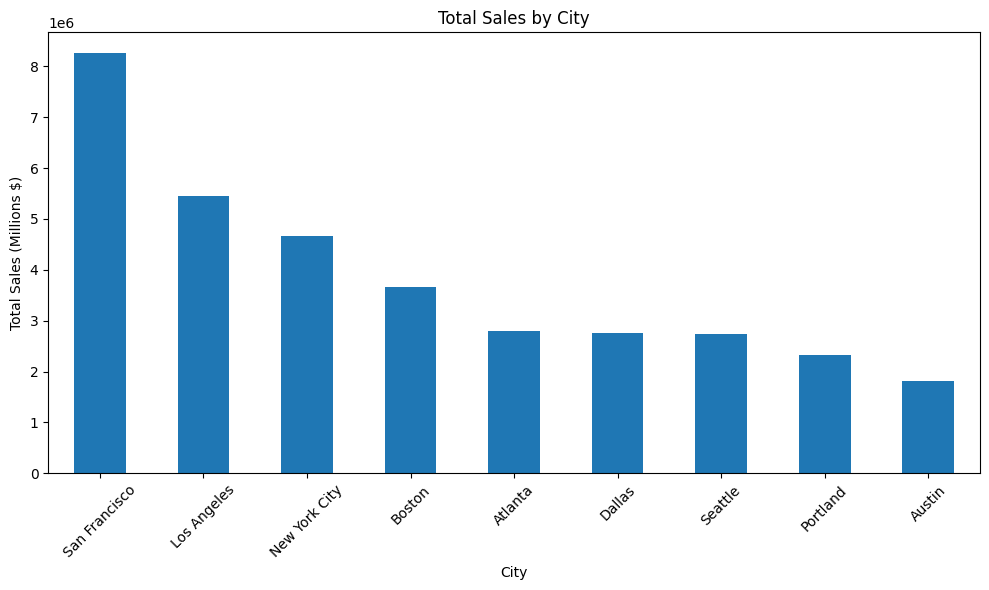

In [9]:
# Group the data by City and sum the Total Price
city_sales = df_cleaned.groupby('City')['Total Price'].sum().sort_values(ascending=False)

# Get the city with the highest sales
highest_sales_city = city_sales.head(1).index[0]
highest_sales_value = city_sales.head(1).values[0]

print(f"The city with the highest total sales price is {highest_sales_city} with ${highest_sales_value:.2f} in sales.")

# Visualize the total sales by city
plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar')
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales (Millions $)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The answer :**

The city with the highest total sales price is San Francisco over 8 million $ in sales.

## Q3: What time should we display advertisements to maximize the likelihood of customer's buying a product?

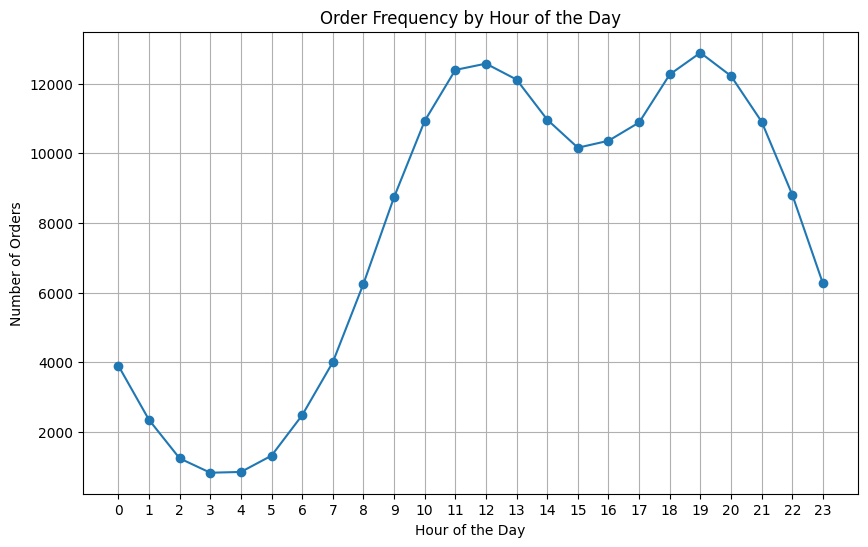

In [10]:
# Group the data by 'Order Hour' and count the number of orders in each hour
hourly_order_counts = df_cleaned.groupby('Order Hour').size()

# Visualize the order counts by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_order_counts.index, hourly_order_counts.values, marker='o')
plt.title("Order Frequency by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(range(24))  # Show all 24 hours
plt.grid(True)
plt.show()


**The answer**

Based on the analysis of order frequency by hour of the day, it is recommended to display advertisements during the following time frames to maximize the likelihood of customer purchases:

- **From 11:00 AM to 1:00 PM**: This time period experiences a peak in order frequency, indicating that many customers are making purchases during their lunch break.

- **From 6:00 PM to 8:00 PM**: The evening hours also show a significant increase in order frequency, suggesting that customers are likely to make purchases after work.

By targeting these specific time frames for advertisements, you can increase the likelihood of customers buying your products.

## Q4: What product sold the most? Why do you think it sold the most?

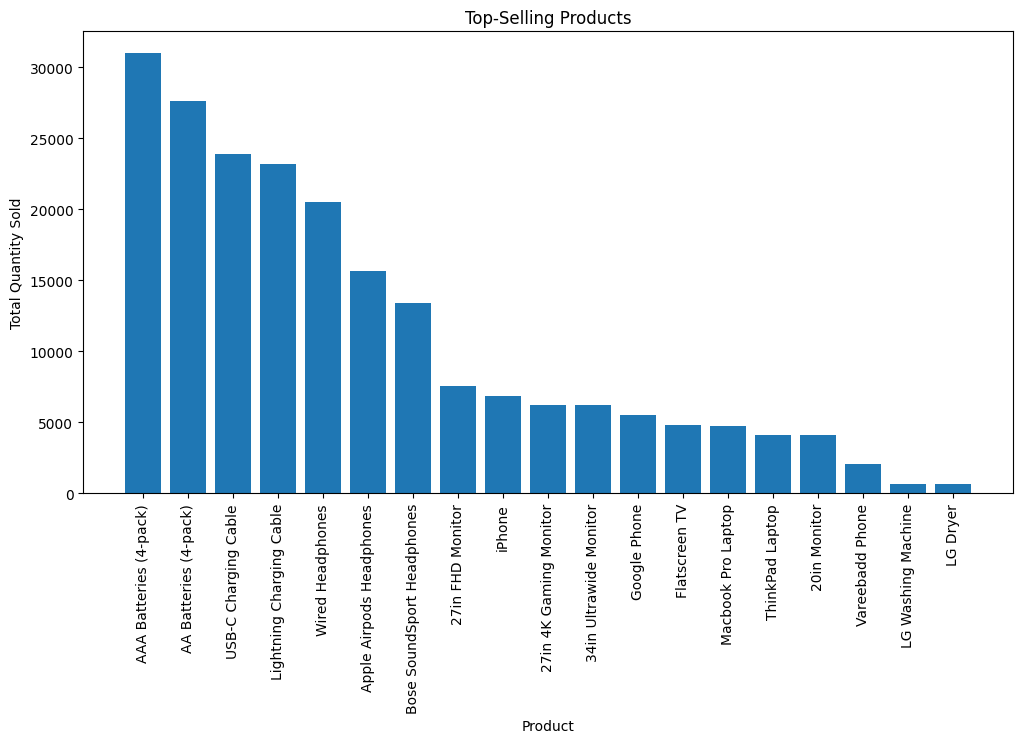

In [11]:
# Group the data by product and sum the quantities sold for each product
product_sales = df_cleaned.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the products by quantity sold in descending order
product_sales_sorted = product_sales.sort_values(by='Quantity Ordered', ascending=False)

# Visualize the top-selling products
plt.figure(figsize=(12, 6))
plt.bar(product_sales_sorted['Product'], product_sales_sorted['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top-Selling Products')
plt.xticks(rotation=90)
plt.show()

**What product sold the most?**

The product that sold the most is the "AAA Batteries (4-pack)." This product outperformed all others in terms of quantity sold. 


**Why do you think it sold the most?**

 the success of the AAA Batteries (4-pack) can be attributed to its essential nature, affordability, versatility, and potential marketing strategies. These factors collectively make it the top-selling product in our dataset.

# Q5: How much probability for next people will ordered USB-C Charging Cable, iPhone, Google Phone and Wired Headphones?

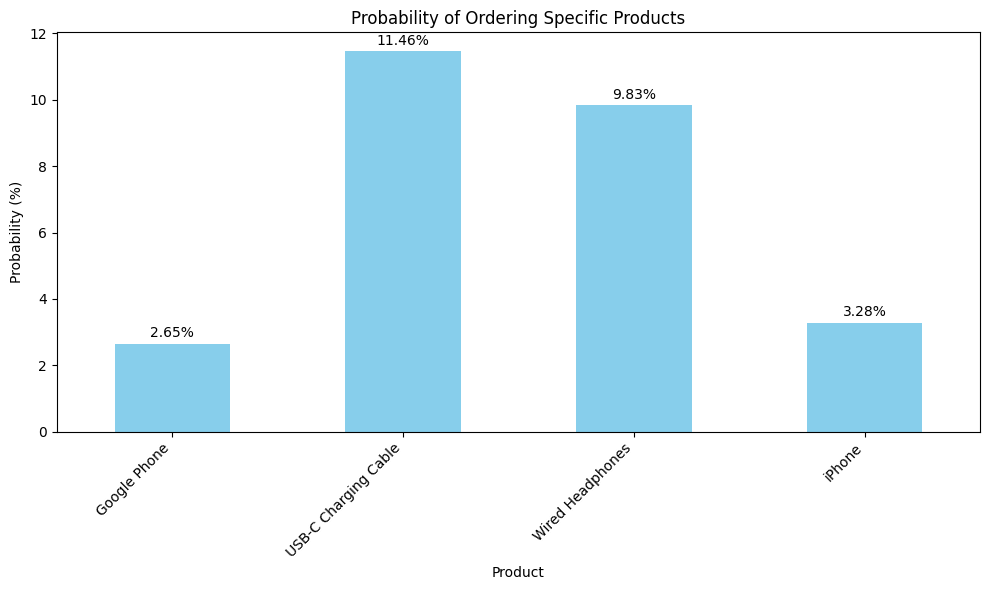

In [12]:
# Define the specific products
specific_orders = ["USB-C Charging Cable", "iPhone", "Google Phone", "Wired Headphones"]

# Filter the data for specific products
filtered_data = df_cleaned[df_cleaned['Product'].isin(specific_orders)]

# Calculate probabilities for each product
product_probs = (
    filtered_data.groupby('Product')['Quantity Ordered']
    .sum() / df_cleaned['Quantity Ordered'].sum() * 100
).round(2)

# Create a bar chart to visualize the probabilities
plt.figure(figsize=(10, 6))
product_probs.plot(kind='bar', color='skyblue')
plt.title('Probability of Ordering Specific Products')
plt.xlabel('Product')
plt.ylabel('Probability (%)')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for x, y in enumerate(product_probs):
    plt.text(x, y+0.2 , f'{y}%', ha='center')

# Show the bar chart
plt.tight_layout()
plt.show()

**Here are the calculated probabilities as percentages of the total quantity ordered for each product:**

- **USB-C Charging Cable**: 11.46%
- **iPhone**: 3.28%
- **Google Phone**: 2.65%
- **Wired Headphones**: 9.38%

The bar chart above illustrates these probabilities, making it easier to visualize and compare the likelihood of customers ordering these specific products.

# Q6: What products are most often sold together?

In [13]:
# Group products within each order
df_cleaned['Grouped Products'] = df_cleaned.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Drop duplicate rows to count unique combinations
df_unique = df_cleaned[['Order ID', 'Grouped Products']].drop_duplicates()

# Count the combinations of products
from itertools import combinations
from collections import Counter

product_count = Counter()

for row in df_unique['Grouped Products']:
    products = row.split(', ')
    product_count.update(Counter(combinations(products, 2)))  # Change '2' to the desired combination size

# Find the most common combinations
most_common_combinations = product_count.most_common(10)  # Change '10' to the desired number of results

# Display the most common combinations
for combination, count in most_common_combinations:
    print(f"Combination: {', '.join(combination)} - Count: {count}")

Combination: iPhone, Lightning Charging Cable - Count: 1002
Combination: Google Phone, USB-C Charging Cable - Count: 985
Combination: iPhone, Wired Headphones - Count: 447
Combination: Google Phone, Wired Headphones - Count: 413
Combination: Vareebadd Phone, USB-C Charging Cable - Count: 361
Combination: iPhone, Apple Airpods Headphones - Count: 360
Combination: Google Phone, Bose SoundSport Headphones - Count: 220
Combination: USB-C Charging Cable, Wired Headphones - Count: 159
Combination: Vareebadd Phone, Wired Headphones - Count: 143
Combination: Lightning Charging Cable, Wired Headphones - Count: 92


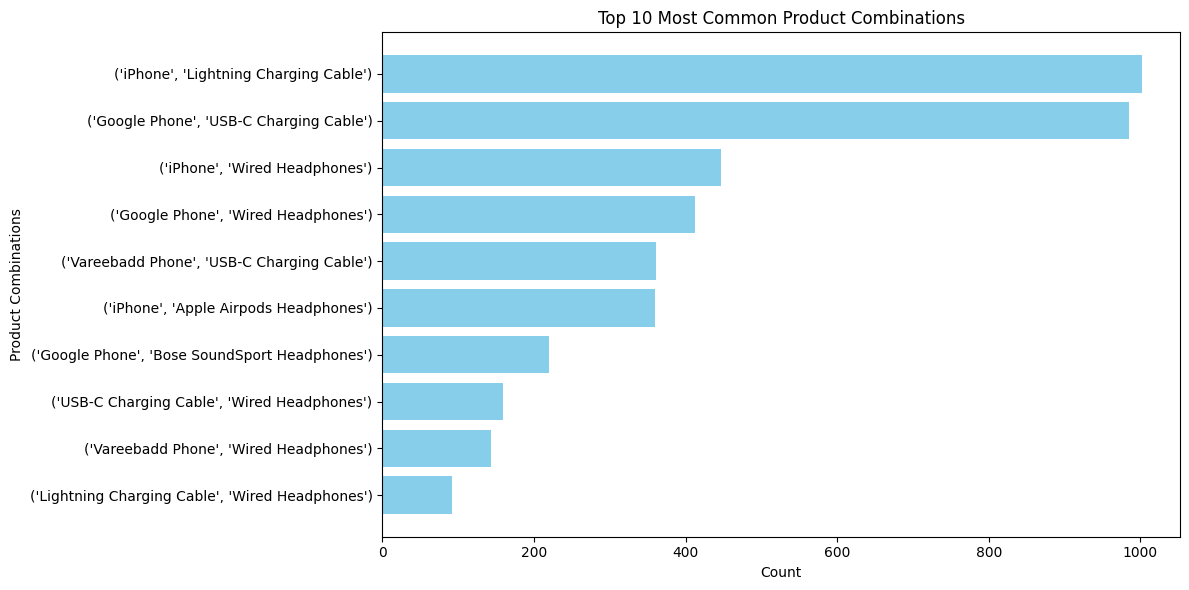

In [14]:
# Extract the combinations and counts
combinations, counts = zip(*most_common_combinations)

# Convert counts to an array
counts = np.array(counts)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(np.arange(len(combinations)), counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Product Combinations')
plt.title('Top 10 Most Common Product Combinations')
plt.yticks(np.arange(len(combinations)), combinations)  # Set y-axis labels to combinations
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent at the top
plt.tight_layout()

# Show the plot
plt.show()


## Summary 
---

# Sales Data Analysis Project

## Introduction
This project aims to analyze sales data to gain insights and answer various questions related to sales performance.

## Data Cleaning

### Step 1: Load the Data
We start by loading the sales data into a DataFrame.

### Step 2: Handle Missing Values
Identify and handle missing values in the dataset.

### Step 3: Remove Duplicates
Identify and remove duplicate rows in the dataset.

### Step 4: Data Type Conversion
Convert data types of specific columns to make them suitable for analysis.

### Step 5: Extract Date Components
Extract date components like month and hour from the order date.

## Exploratory Data Analysis

### Q1: What was the best month for sales? How much was earned that month?
Analyze monthly sales data and identify the best-performing month. Visualized with a line chart.

### Q2: What City had the highest number of sales?
Determine the city with the highest number of sales. Visualized with a bar chart.

### Q3: What time should we display advertisements to maximize the likelihood of customers buying a product?
Identify the most effective time to display advertisements for better sales. Visualized with a line chart.

### Q4: What product sold the most? Why do you think it sold the most?
Identify the best-selling product and provide insights into why it performed well. Visualized with a bar chart.

### Q5: How much probability for next people will order USB-C Charging Cable, iPhone, Google Phone, and Wired Headphones?
Determine the likelihood of specific product combinations being purchased together. Visualized with a bar chart.

### Q6: What products are most often sold together?
Find products that are frequently purchased together. Visualized with a bar chart.

## Conclusion
This data analysis project provides valuable insights into sales performance and customer behavior. It can help in making informed business decisions to improve sales strategies and maximize revenue.
